In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DS - Assignment Part 1 data set.xlsx to DS - Assignment Part 1 data set.xlsx


In [ ]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['DS - Assignment Part 1 data set.xlsx']))

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# machine learning

import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
from sklearn.ensemble import BaggingRegressor
import xgboost
from numpy import nan
from numpy import isnan
from sklearn.metrics import mean_squared_error

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
null_series =df.isnull().sum()
print('No of columns with null values\n', null_series[null_series > 0].sort_values(ascending=False))

No of columns with null values
 Series([], dtype: int64)


In [ ]:
df.drop(['Transaction date','latitude',	'longitude'],axis=1,inplace=True)

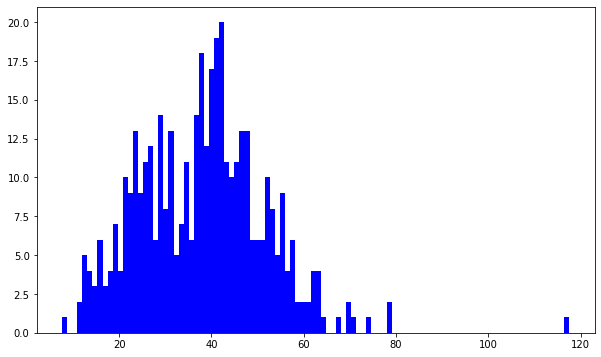

In [ ]:
df['House price of unit area'].hist(bins = 100, grid = False, color = 'blue', figsize = (10,6))
plt.show()

In [ ]:
df.agg({'House price of unit area':['mean', 'median','skew','kurtosis', 'std','min','max']})

,House price of unit area
mean,37.980193
median,38.450000
skew,0.599853
kurtosis,2.179097
std,13.606488
min,7.600000
max,117.500000


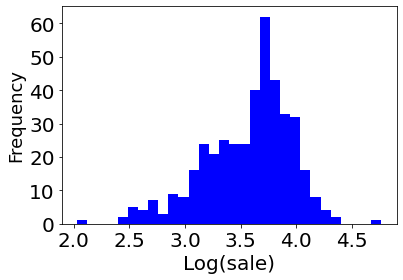

In [ ]:
np.log(df['House price of unit area']).plot.hist(bins=30, color = 'blue')
plt.xlabel('Log(sale)', fontsize=20)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
df_subset = df.select_dtypes(include = [np.number])
df_subset

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


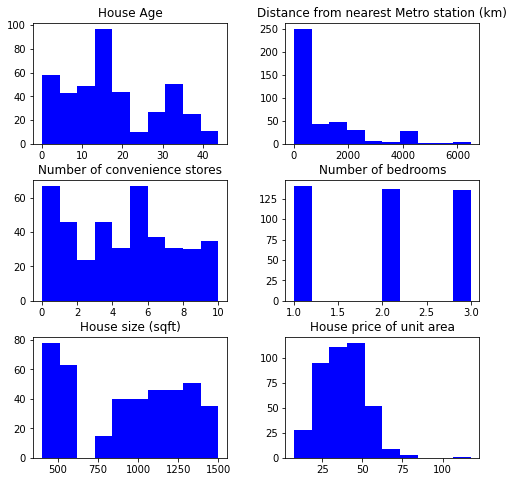

In [ ]:
df_subset.hist(figsize = (8,8), grid = False, color ='blue')
plt.show()

In [ ]:
num_rows = len(df_subset.index)
low_information_cols = []

for col in df_subset.columns:
    cnts = df_subset[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [ ]:
np.seterr(divide = 'ignore')
log_df_subset = np.log(df_subset)
log_df_subset = log_df_subset.replace(to_replace = float('-inf'), value = 0)
log_df_subset

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,3.465736,4.441225,2.302585,0.000000,6.354370,3.634951
1,2.970414,5.725527,2.197225,0.693147,7.122867,3.742420
2,2.587764,6.331474,1.609438,1.098612,6.966024,3.856510
3,2.587764,6.331474,1.609438,0.693147,6.774224,4.003690
4,1.609438,5.967603,1.609438,0.000000,6.196444,3.763523
...,...,...,...,...,...,...
409,2.617396,8.314346,0.000000,1.098612,6.688355,2.734368
410,1.722767,4.504864,2.197225,0.693147,7.153052,3.912023
411,2.933857,5.968630,1.945910,0.000000,6.220590,3.703768
412,2.091864,4.652150,1.609438,0.000000,6.391917,3.960813


Removing collinear Features

Multicollinearity is a situation in which predictor variables are extremely correlated to each other. The presense of multicollinearity in the regression model can inflate the standard errors of coefficients. The artificial increase in standard errors can lead to biased, inconsistency, and unreliable in estimation.

In [ ]:
df_features_multicollinearity = log_df_subset.corr()
df_features_multicollinearity

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.209037,-0.051492,-0.047806,-0.080013,-0.307068
Distance from nearest Metro station (km),0.209037,1.000000,-0.644680,-0.051837,-0.038616,-0.760865
Number of convenience stores,-0.051492,-0.644680,1.000000,0.015266,0.011348,0.595439
Number of bedrooms,-0.047806,-0.051837,0.015266,1.000000,0.856693,0.038222
House size (sqft),-0.080013,-0.038616,0.011348,0.856693,1.000000,0.023554
House price of unit area,-0.307068,-0.760865,0.595439,0.038222,0.023554,1.000000


In [ ]:
# checking the any variables who correlation coeffcient is above 70.
len(df_features_multicollinearity[df_features_multicollinearity > .70])

6

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.iloc[:, :-1]# Independent Variable
y = df.iloc[:, -1] # Dependent Variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 5)
(83, 5)
(331,)
(83,)


In [ ]:
import numpy as np
from numpy import reshape 
from sklearn.preprocessing import StandardScaler
#y_train= scaler.fit_transform(y_train.reshape(-1,1))
import numpy as np
y_train=np.array(y_train)
y_test=np.array(y_test)

#ytrain= y_train.reshape((-1, 1))
y_train= y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [ ]:
#print(y_train)
y_train=y_train.T

In [ ]:
imputer = SimpleImputer(missing_values=nan, strategy='median')
X_train = imputer.fit_transform(X_train)
print('Missing: %d' % isnan(X_train).sum())

Missing: 0


In [ ]:
y_train = imputer.fit_transform(y_train)
print('Missing: %d' % isnan(y_train).sum())

Missing: 0


In [ ]:
def RMSE(y_tra, y_pred):
    return mean_squared_error(y_tra, y_pred,squared = False)

In [ ]:
def fit_and_evaluate (model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_RMSE = RMSE(y_test, model_pred)
    return model_RMSE

In [ ]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(414, 5)
(414,)


In [ ]:
#y_train= y_train.reshape((,1))
#y_test = y_test.reshape((83,1))

In [ ]:
# Support Vector Regressor
#svr = SVR(C=1.0, epsilon=0.2)
svr=SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


8.592010935496786

In [ ]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_RMSE = fit_and_evaluate(gradient_boosted)
gradient_boosted_RMSE

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


7.691355903064228

In [ ]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_RMSE = fit_and_evaluate(random_forest)
random_forest_RMSE

<ipython-input-65-e8805c5f174e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


7.4743100765543495

In [ ]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_RMSE = fit_and_evaluate(gradient_boosted)
gradient_boosted_RMSE

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


7.691355903064228

In [ ]:
# Bagging Regressor
bagging = BaggingRegressor()
bagging_RMSE = fit_and_evaluate(bagging)
bagging_RMSE

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


8.351984613728153

In [ ]:
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_RMSE = fit_and_evaluate(knn)
knn_RMSE

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


7.6791755644338275

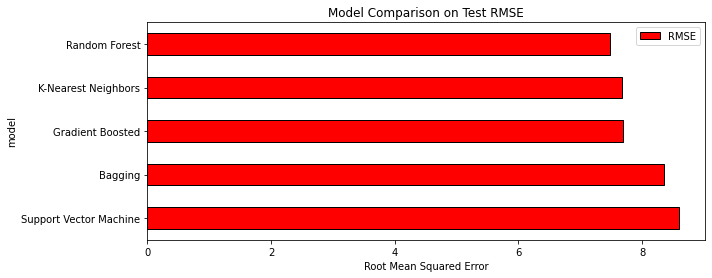

In [ ]:
model_comparison = pd.DataFrame({'model': [ 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors', 'Bagging'],
                                 'RMSE': [svr_RMSE, random_forest_RMSE, 
                                         gradient_boosted_RMSE, knn_RMSE,bagging_RMSE]})

model_comparison.sort_values('RMSE', ascending = False).plot(x = 'model',
                                                             y = 'RMSE', kind = 'barh', color = 'red',
                                                             edgecolor = 'black', figsize = (10,4))
plt.xlabel('Root Mean Squared Error')
plt.title('Model Comparison on Test RMSE')
plt.show()

upport Vector Machine Regressor

Since the Supoort Vector Regressor has the lowest Root Mean Squared Error (RMSE) among the regressor. So we will proceed predicting the house price with SVR

In [ ]:
SVM = SVR().fit(X_train, y_train)
score = SVM.score(X_train, y_train)
print('R_squared:', score)
print('RMSE:', svr_RMSE)

R_squared: 0.5041579180836482
RMSE: 8.592010935496786


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
HousePrice_Prediction_with_log = SVM.predict(X_test)
HousePrice_Prediction_with_log

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([20.57379194, 29.51981846, 43.78686505, 45.36391314, 45.76699709,
       45.67651509, 25.62266608, 43.60740752, 43.58133585, 20.76968034,
       42.61959981, 28.25070676, 40.77781795, 43.18451114, 40.27226337,
       21.44351954, 41.64774102, 39.93826149, 21.21233159, 41.39921425,
       43.81872748, 42.63210061, 25.82801138, 28.64892403, 41.31311896,
       43.14726621, 25.108204  , 41.21048746, 20.77837485, 43.0141869 ,
       37.78765552, 43.04185093, 41.59499115, 42.89960595, 41.83007811,
       40.68428494, 42.85714306, 44.2732071 , 40.66484885, 41.30682437,
       22.48009867, 40.68550281, 19.87339526, 26.4564377 , 42.62791798,
       39.42074904, 24.48251052, 39.80726491, 36.49243213, 32.44733586,
       40.48560438, 23.29947051, 44.5966146 , 41.34678543, 45.57525318,
       40.38350273, 40.91872483, 44.50622567, 45.42784874, 43.64817669,
       30.96349914, 42.23957936, 26.53536938, 28.21406429, 24.5064786 ,
       43.20746168, 28.15945888, 30.25014692, 43.74385298, 42.78

In [ ]:
HousePrice_Prediction_without_log = np.exp(HousePrice_Prediction_with_log)
HousePrice_Prediction_without_log

array([8.61160918e+08, 6.61141263e+12, 1.03846980e+19, 5.02686421e+19,
       7.52236303e+19, 6.87160929e+19, 1.34209262e+11, 8.67873554e+18,
       8.45539056e+18, 1.04750852e+09, 3.23189332e+18, 1.85834376e+12,
       5.12367202e+17, 5.68584336e+18, 3.09045024e+17, 2.05495450e+09,
       1.22288075e+18, 2.21292443e+17, 1.63079195e+09, 9.53784592e+17,
       1.07209075e+19, 3.27254817e+18, 1.64802130e+11, 2.76738523e+12,
       8.75103853e+17, 5.47796971e+18, 8.02332620e+10, 7.89745757e+17,
       1.05665579e+09, 4.79539087e+18, 2.57614484e+16, 4.92990273e+18,
       1.16004579e+18, 4.27624068e+18, 1.46747969e+18, 4.66616886e+17,
       4.09846038e+18, 1.68892179e+19, 4.57635241e+17, 8.69612732e+17,
       5.79405755e+09, 4.67185509e+17, 4.27470255e+08, 3.08947656e+11,
       3.25888888e+18, 1.31890581e+17, 4.29159984e+10, 1.94122328e+17,
       7.05442962e+15, 1.23509089e+14, 3.82537996e+17, 1.31471456e+10,
       2.33379999e+19, 9.05067053e+17, 6.20984798e+19, 3.45408002e+17,
      